# Quiz

### Scenario

You can restore impaired vision using stem cells. Scientists found a strong correlation between the number of stem cells added to the eyes of mice and their vision improvement (all mice started at a photoreceptor activity* of 0). Note: This example has been simplified for the purposes of this lesson.

*Photoreceptor activity is a measure of how well eyes perceive light. The higher the photoreceptor activity the better one's vision.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../Data/Vision-And-Stem-Cells-Lesson-15.csv')
df.head()

,Number of stem cells,Photoreceptor activity
0,116,60
1,117,67
2,120,64
3,1,8
4,52,13


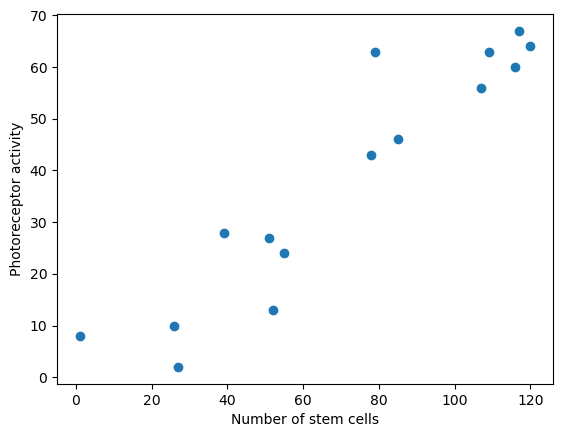

In [3]:
cells = df['Number of stem cells'].values
activity = df['Photoreceptor activity'].values

plt.scatter(cells, activity)
plt.xlabel('Number of stem cells')
plt.ylabel('Photoreceptor activity')
plt.show()

In [4]:
cells_mean = np.mean(cells)
activity_mean = np.mean(activity)
print('Mean number of stem cells:', cells_mean)
print('Mean photoreceptor activity:', activity_mean)

Mean number of stem cells: 70.8
Mean photoreceptor activity: 38.266666666666666


In [5]:
cells_std = np.std(cells, ddof=1)
activity_std = np.std(activity, ddof=1)
print('Stem cell standard deviation:', cells_std)
print('Photoreceptor activity standard deviation:', activity_std)

Stem cell standard deviation: 38.258892523736975
Photoreceptor activity standard deviation: 23.42912310616446


In [6]:
r = stats.pearsonr(cells, activity)[0]
print('Pearson correlation coefficient:', r)

r_squared = r**2
print('r-squared:', r_squared)

Pearson correlation coefficient: 0.934465030624902
r-squared: 0.8732248934607991


In this case, $r^2$ is the proportion of the variation in photoreceptor activity that can be explained by the number of stem cells.

In this case, because we are using data from an experimental study, we can go further and say that $r^2$ is the proportion of the variation in photoreceptor activity that is *caused* by the number of stem cells.

In [7]:
slope = r * (activity_std / cells_std)
print('Slope:', slope)

intercept = activity_mean - slope * cells_mean
print('Intercept:', intercept)

Slope: 0.5722511760457536
Intercept: -2.2487165973726846


Thus, our equation is $$\hat{y} = 0.572\cdot x - 2.25$$

In [8]:
coeff = np.polyfit(cells, activity, 1)
print('Slope and intercept:', coeff)

Slope and intercept: [ 0.57225118 -2.2487166 ]


##### Question 1

Photoreceptor activity of 70 is considered normal. How many stem cells would we expect are needed for a visually impaired mouse (meaning photoreceptor activity is 0) to have normal vision?

In [9]:
print((70-intercept)/slope)

126.25350479244125


##### Question 2
The mice need at least ______ stem cells added to their eyes to have a positive value of photoreceptor activity.

In [10]:
print(-intercept/slope)

3.9295971620561447


##### Question 3

The confidence interval for a slope of a regression line is $(-0.684, 1.733)$. What can we conclude?  
Answer:
* The correlation coefficient $r$ is not significant.
* The slope of the regression line for the *sample* data is definitely between -0.684 and 1.733.
* The true slope for the population ($\hat{\beta}_1$) could be negative.

##### Question 4

Write the correct symbol used by convention for each of the following values.  
Answer:
* Observed values of $y \quad y_i$
* Observed values of $x \quad x_i$
* Expected values of $y \quad \hat{y}_i$
* Slope of regression line based on sample data $\quad b$
* y-intercept of regression line based on sample data $\quad a$
* True slope $\quad \beta_1$
* True y-intercept $ \quad \beta_0$

##### Question 5
Compute the confidence intervals for the below examples with a standard error of the estimate of $3.5$.

In [11]:
predictions = np.array([2.85, 2.6, 2.35, 3.35])

se = 3.5
for i in predictions:
    print('confidence interval, {}: ({}, {})'.format(i, i- se, i + se))

confidence interval, 2.85: (-0.6499999999999999, 6.35)
confidence interval, 2.6: (-0.8999999999999999, 6.1)
confidence interval, 2.35: (-1.15, 5.85)
confidence interval, 3.35: (-0.1499999999999999, 6.85)


### Example - Statsmodels #1

In [12]:
df = pd.read_csv('../../Data/carats.csv', header=None)
df.columns = ['carats', 'price']
df.head()

,carats,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


In [13]:
# Add intercept column
df['intercept'] = 1

In [14]:
# Create linear model
lm = sm.OLS(df['price'], df[['intercept', 'carats']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           6.75e-40
Time:                        16:25:10   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -259.6259     17.319    -14.991      0.000    -294.487    -224.765
carats      3721.0249     81.786     45.497      0.000    3556.398    3885.651
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

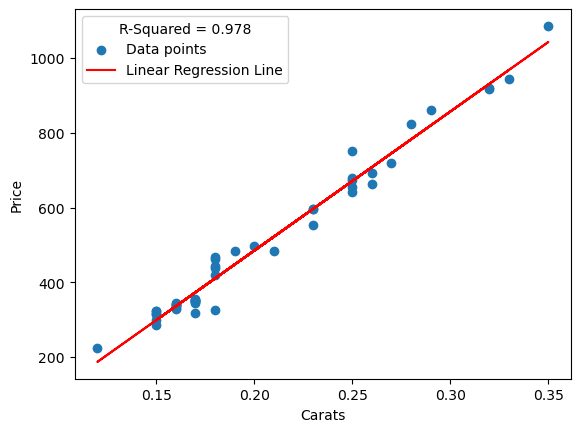

In [27]:
slope = results.params[1]
intercept = results.params[0]
r_squared = results.rsquared

plt.scatter(df['carats'], df['price'])
plt.plot(df['carats'], slope*df['carats'] + intercept, color='red')
plt.xlabel('Carats')
plt.ylabel('Price')
plt.legend(['Data points', 'Linear Regression Line'], title='R-Squared = {}'.format(round(r_squared, 3)))
# plt.annotate('r-squared = {}'.format(round(r_squared, 3)), xy=(0.05, 0.8), xycoords='axes fraction')
plt.show()

### Example - Statsmodels #2

[California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

NOTE: This example was initially supposed to be run over the boston dataset which has been removed from sklearn.

In [29]:
from sklearn.datasets import fetch_california_housing

In [31]:
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['MedianHouseValue'] = housing_data.target # In $100,000s
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
# Add intercept column
df['intercept'] = 1

# Create linear model
lm = sm.OLS(df['MedianHouseValue'], df[['intercept', 'MedInc']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1305.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:13:37   Log-Likelihood:                -30450.
No. Observations:               20640   AIC:                         6.091e+04
Df Residuals:                   20636   BIC:                         6.094e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5235      0.027     57.031      0.000       1.471       1.576
AveBedrms     -1.5932      0.029    -54.126      0.000      -1.651      -1.535
AveRooms       0.3415      0.006     60.031      0.000       0.330       0.353
HouseAge       0.0153      0.001     25.725      0.000       0.014       0.016
==============================================================================
Omnibus:                     2244.689   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3090.508
Skew:                           0.876   Prob(JB):                         0.00
Kurtosis:                       3.723   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

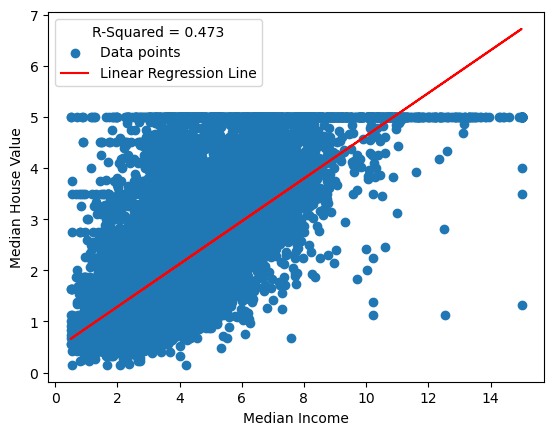

In [34]:
slope = results.params[1]
intercept = results.params[0]
r_squared = results.rsquared

plt.scatter(df['MedInc'], df['MedianHouseValue'])
plt.plot(df['MedInc'], slope*df['MedInc'] + intercept, color='red')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend(['Data points', 'Linear Regression Line'], title='R-Squared = {}'.format(round(r_squared, 3)))
# plt.annotate('r-squared = {}'.format(round(r_squared, 3)), xy=(0.05, 0.8), xycoords='axes fraction')
plt.show()